<a href="https://colab.research.google.com/github/weathon/3d2smile/blob/main/playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import time, multiprocessing

end1, end2 = multiprocessing.Pipe()
def getitem(index):
  # print(f"reading {index}")
  time.sleep(1)
  end2.send(500)
  # print(f"sent")

getitem(-1) #undeerstood, the get item return none and it is saved, why my brain is not working today
for i in range(10):
  if not end1.poll():
    print("WARNING: reading too slow")
  print(end1.recv())
  p = multiprocessing.Process(target=getitem, args=(str(0),))
  p.start()
  time.sleep(2)

#understood, there was none at the begining

500
500
500


KeyboardInterrupt: ignored

In [ ]:
end1.recv() # confirmed, ther eis a none after first send

In [ ]:
import time, multiprocessing

end1, end2 = multiprocessing.Pipe()
def getitem(index):
  print(f"reading {index}")
  end2.send(500)
  print(f"sent")
p = multiprocessing.Process(target=getitem, args=(str(0),))
p.start()

reading 0
sent


In [ ]:
end1.recv()

500

In [ ]:
# # https://www.velotio.com/engineering-blog/async-features-in-python#:~:text=An%20async%20function%20uses%20the,Tasks%20as%20a%20Future%20object. guanjietongdautui
# import asyncio
# async def read_file(a):
#   print(f"reading {a}")
#   await asyncio.sleep(1)
#   print(f"finished reading {a}")
#   return a

# async def main():
#     taskA = asyncio.create_task(read_file('taskA'))
#     await asyncio.wait([taskA])

# asyncio.run(main())

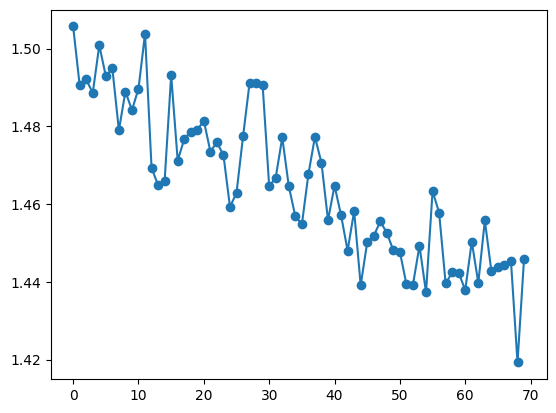

In [ ]:
history = """EPOCH 1:
Example Output: CCCCCCCCCC
Training loss: 1.5056668996810914
Training loss: 1.4905302405357361
Example Output: CCCCCCCCCC
Training loss: 1.49205322265625
Training loss: 1.4885518193244933
Example Output: CCCCCCCCCC
Training loss: 1.5008455276489259
Training loss: 1.4929023861885071
Example Output: CCCCCCCCCC
Training loss: 1.494894516468048
Training loss: 1.4789785146713257
Example Output: CCCCCCCCCC
Training loss: 1.488943600654602
Training loss: 1.484151554107666
Example Output: CCCCCCCCCC
Training loss: 1.4896686792373657
Training loss: 1.503781497478485
Example Output: CCCCCCCCCC
Training loss: 1.4692835450172423
Training loss: 1.464872145652771
Example Output: CCCCCCCCCC
Training loss: 1.4660223007202149
Training loss: 1.4931326627731323
Example Output: CCCCCCCCCC
Training loss: 1.4711901903152467
Training loss: 1.476701033115387
Example Output: CCCCCCCCCC
Training loss: 1.4786455750465393
Training loss: 1.4790977716445923
Example Output: CCCCCCCCCC
Training loss: 1.481420111656189
Training loss: 1.4735169410705566
Example Output: CCCCCCCCCC
Training loss: 1.4758571982383728
Training loss: 1.4726030230522156
Example Output: CCCCCCCCCC
Training loss: 1.4592734098434448
Training loss: 1.4628987789154053
Example Output: CCCCCCCCCC
Training loss: 1.477398157119751
Training loss: 1.4911863207817078
Example Output: CCCCCCCCCC
Training loss: 1.491250228881836
Training loss: 1.490499484539032
Example Output: CCCCCCCCCC
Training loss: 1.464557445049286
Training loss: 1.466812801361084
Example Output: CCCCCCCCCC
Training loss: 1.4771416544914246
Training loss: 1.4645928740501404
Example Output: CCCCCCCCCC
Training loss: 1.4568310379981995
Training loss: 1.4547734618186952
Example Output: CCCCCCCCCC
Training loss: 1.4676785588264465
Training loss: 1.4772716641426087
Example Output: CCCCCCCCCC
Training loss: 1.4706100344657898
Training loss: 1.4558680176734924
Example Output: CCCCCCCCCC
Training loss: 1.4647307991981506
Training loss: 1.4571103930473328
Example Output: CCCCCCCCCC
Training loss: 1.4480185627937316
Training loss: 1.458189356327057
Example Output: CCCCCCCCCC
Training loss: 1.439108169078827
Training loss: 1.450178587436676
Example Output: CCCCCCCCCC
Training loss: 1.4518282532691955
Training loss: 1.4555275440216064
Example Output: CCCCCCCCCC
Training loss: 1.4526208639144897
Training loss: 1.448076355457306
Example Output: CCCCCCCCCC
Training loss: 1.4476839303970337
Training loss: 1.4393787503242492
Example Output: CCCCCCCCCC
Training loss: 1.4393077969551087
Training loss: 1.4492653369903565
Example Output: CCCCCCCCCC
Training loss: 1.4372838139533997
Training loss: 1.4633198142051698
Example Output: CCCCCCCCCC
Training loss: 1.4578147411346436
Training loss: 1.4395763754844666
Example Output: CCCCCCCCCC
Training loss: 1.4424136281013489
Training loss: 1.4423179864883422
Example Output: CCCCCCCCCC
Training loss: 1.4378762364387512
Training loss: 1.4503512382507324
Example Output: CCCCCCCCCC
Training loss: 1.4397329688072205
Training loss: 1.4558201670646667
Example Output: CCCCCCCCCC
Training loss: 1.4427222967147828
Training loss: 1.4437400221824646
Example Output: CCCCCCCCCC
Training loss: 1.4442493677139283
Training loss: 1.4452995181083679
Example Output: CCCCCCCCCC
Training loss: 1.4192635893821717
Training loss: 1.4459753513336182
Example Output: CCCCCCCCCC"""
history = [float(i.split(":")[1]) for i in history.split("\n") if "loss" in i ]
import pylab
import numpy as np
pylab.scatter(np.arange(len(history)), history)
pylab.plot(np.arange(len(history)), history)